In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import operator
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import warnings
warnings.filterwarnings('ignore')

/home/lab321-day/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:

import keras
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, Dense, Input, add, Activation, GlobalAveragePooling2D
from keras.initializers import he_normal
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.models import Model
from keras import optimizers
from keras import regularizers

num_classes        = 10
img_rows, img_cols = 32, 32
img_channels       = 3
stack_num          = 18
batch_size         = 128
epochs             = 200
iterations         = 391
weight_decay       = 0.0005
log_filepath       = r'./resnet50/'

AttributeError: module 'pandas' has no attribute 'computation'

In [2]:
def scheduler(epoch):
    if epoch <= 60:
        return 0.1
    if epoch <= 120:
        return 0.02
    if epoch <= 160:
        return 0.004
    return 0.0008

def color_preprocessing(x_train,x_test):
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train[:,:,:,0] = (x_train[:,:,:,0] - np.mean(x_train[:,:,:,0])) / np.std(x_train[:,:,:,0])
    x_train[:,:,:,1] = (x_train[:,:,:,1] - np.mean(x_train[:,:,:,1])) / np.std(x_train[:,:,:,1])
    x_train[:,:,:,2] = (x_train[:,:,:,2] - np.mean(x_train[:,:,:,2])) / np.std(x_train[:,:,:,2])

    x_test[:,:,:,0] = (x_test[:,:,:,0] - np.mean(x_test[:,:,:,0])) / np.std(x_test[:,:,:,0])
    x_test[:,:,:,1] = (x_test[:,:,:,1] - np.mean(x_test[:,:,:,1])) / np.std(x_test[:,:,:,1])
    x_test[:,:,:,2] = (x_test[:,:,:,2] - np.mean(x_test[:,:,:,2])) / np.std(x_test[:,:,:,2])

    return x_train, x_test

def residual_network(img_input,classes_num=10,stack_n=18):
    def residual_block(x,shape,increase_filter=False):
        output_filter_num = shape[1]
        if increase_filter:
            first_stride = (2,2)
        else:
            first_stride = (1,1)

        pre_bn   = BatchNormalization()(x)
        pre_relu = Activation('relu')(pre_bn)

        conv_1 = Conv2D(output_filter_num,
            kernel_size=(3,3),
            strides=first_stride,
            padding='same',
            kernel_initializer=he_normal(),
            kernel_regularizer=regularizers.l2(weight_decay)
            )(pre_relu)
        bn_1   = BatchNormalization()(conv_1)
        relu1  = Activation('relu')(bn_1)
        conv_2 = Conv2D(output_filter_num,
            kernel_size=(3,3),
            strides=(1,1),
            padding='same',
            kernel_initializer=he_normal(),
            kernel_regularizer=regularizers.l2(weight_decay)
            )(relu1)
        if increase_filter:
            projection = Conv2D(output_filter_num,
            kernel_size=(1,1),
            strides=(2,2),
            padding='same',
            kernel_initializer=he_normal(),
            kernel_regularizer=regularizers.l2(weight_decay)
            )(x)
            block = add([conv_2, projection])
        else:
            block = add([conv_2,x])
        return block

    x = Conv2D(filters=16,
        kernel_size=(3,3),
        strides=(1,1),
        padding='same',
        kernel_initializer=he_normal(),
        kernel_regularizer=regularizers.l2(weight_decay)
        )(img_input)

    for _ in range(0,stack_n):
        x = residual_block(x,[16,16])

    x = residual_block(x,[16,32],increase_filter=True)
    for _ in range(1,stack_n):
        x = residual_block(x,[16,32])

    x = residual_block(x,[32,64],increase_filter=True)
    for _ in range(1,stack_n):
        x = residual_block(x,[32,64])

    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(classes_num,activation='softmax',kernel_initializer=he_normal(),kernel_regularizer=regularizers.l2(weight_decay))(x)
    return x



In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
plt.figure(facecolor='white')  
  
for i in range(100):  
    plt.subplot(10, 10, i+1)  
    plt.imshow(x_train[i])  
    plt.axis("off")  
  
plt.show()  

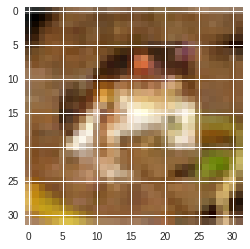

In [9]:
plt.imshow(x_train[0])  

In [ ]:
    # load data
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    # color preprocessing
    x_train, x_test = color_preprocessing(x_train, x_test)

    # build network
    img_input = Input(shape=(img_rows,img_cols,img_channels))
    output = residual_network(img_input,num_classes,18)
    resnet = Model(img_input, output)
    print(resnet.summary())
    # set optimizer
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    resnet.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    # set callback
    tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
    change_lr = LearningRateScheduler(scheduler)
    cbks = [change_lr,tb_cb]

    # set data augmentation
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(horizontal_flip=True,
            width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)

    datagen.fit(x_train)

    # start training
    resnet.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                        steps_per_epoch=iterations,
                        epochs=epochs,
                        callbacks=cbks,
                        validation_data=(x_test, y_test))
    resnet.save('resnet.h5')

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 32, 32, 3)     0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 32, 32, 16)    448         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 32, 32, 16)    64          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32, 32, 16)    0           batch_normalization_1[0][0]      
___________________________________________________________________________________________